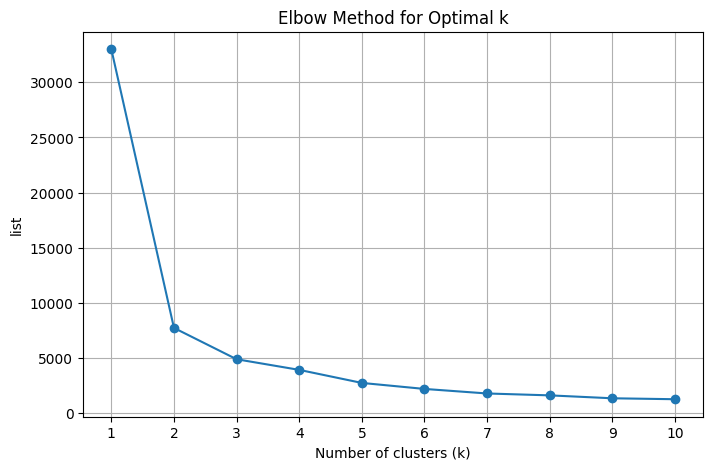

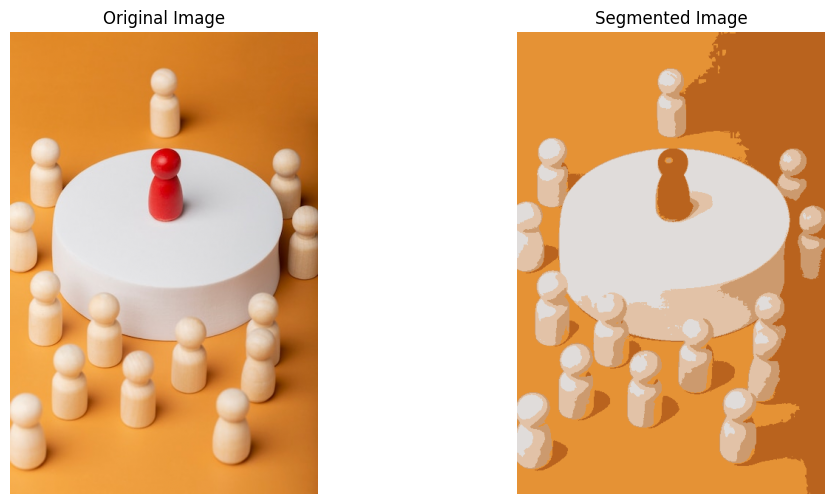

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

# Load and preprocess the image
image = io.imread('https://img.freepik.com/free-photo/protection-concept-with-pawns_23-2149277051.jpg?size=626&ext=jpg')
image = image / 255.0
pixels = image.reshape(-1, 3)

# Elbow method to find optimal k
list = []
k_range = range(1, 11)  # Testing k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
    list.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, list, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('list')
plt.xticks(k_range)
plt.grid()
plt.show()


optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(pixels)

# Get the cluster centers
new_colors = kmeans.cluster_centers_[kmeans.predict(pixels)]

# Reshape back to the original image shape
segmented_image = new_colors.reshape(image.shape)

# Plot original and compressed images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image)
plt.axis('off')

plt.show()


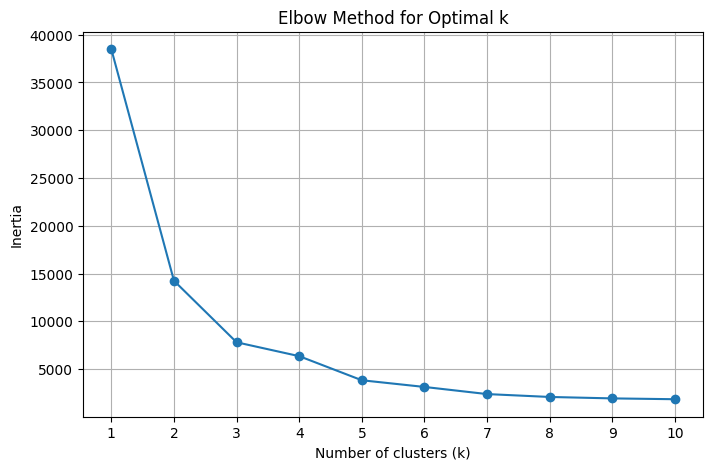

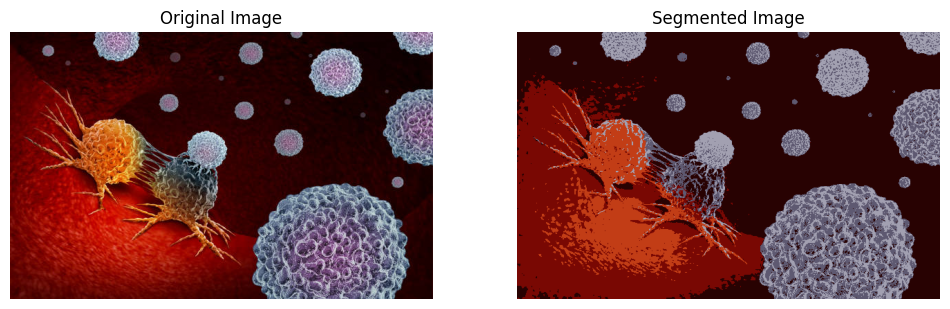

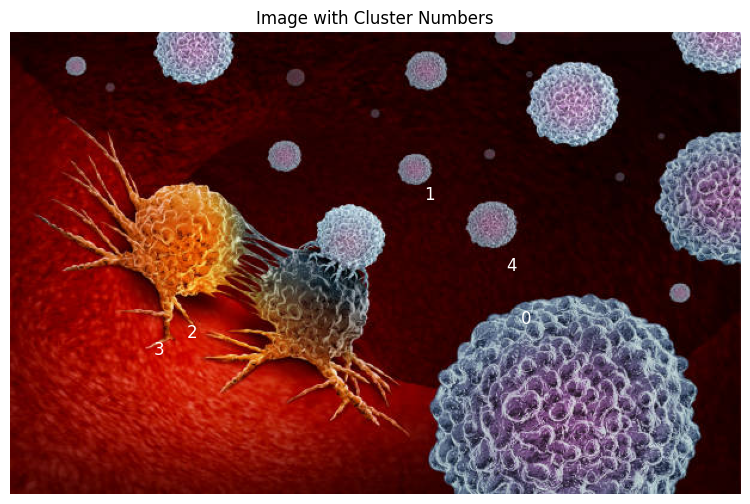

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

# Load and preprocess the image
image = io.imread('https://media.istockphoto.com/id/1097423340/photo/cancer-immunotherapy.jpg?s=612x612&w=0&k=20&c=Ee0coEeJi4L45LeyAeNE-qjUxIlf9tS0lXt3kkDw_4E=')
image = image / 255.0
pixels = image.reshape(-1, 3)

# Elbow method to find optimal k
inertia_list = []
k_range = range(1, 11)  # Testing k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)
    inertia_list.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_list, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()

# Choose optimal k
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(pixels)

# Get the cluster labels for each pixel
labels = kmeans.predict(pixels)

# Create a new image where each pixel is replaced by its cluster color
new_colors = kmeans.cluster_centers_[labels]
segmented_image = new_colors.reshape(image.shape)

# Plot original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image)
plt.axis('off')

plt.show()

# Visualize clusters with numbers
plt.figure(figsize=(12, 6))
plt.imshow(image)
plt.axis('off')

# Get the shape of the image for drawing
h, w, _ = image.shape

# Mark the clusters
for cluster_id in range(optimal_k):
    # Find the coordinates of the pixels in this cluster
    coords = np.argwhere(labels.reshape(image.shape[:2]) == cluster_id)

    if len(coords) > 0:
        # Calculate the center of the cluster
        center_y = int(np.mean(coords[:, 0]))
        center_x = int(np.mean(coords[:, 1]))

        # Annotate the cluster
        plt.text(center_x, center_y, str(cluster_id), color='white', fontsize=12,
                 verticalalignment='center', horizontalalignment='center')

plt.title('Image with Cluster Numbers')
plt.show()


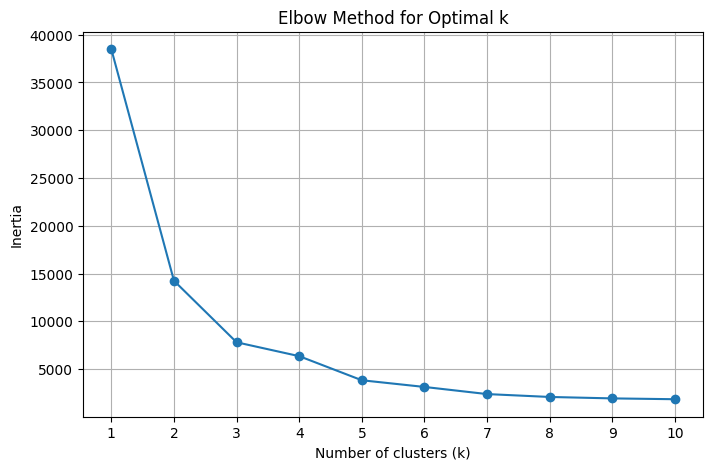

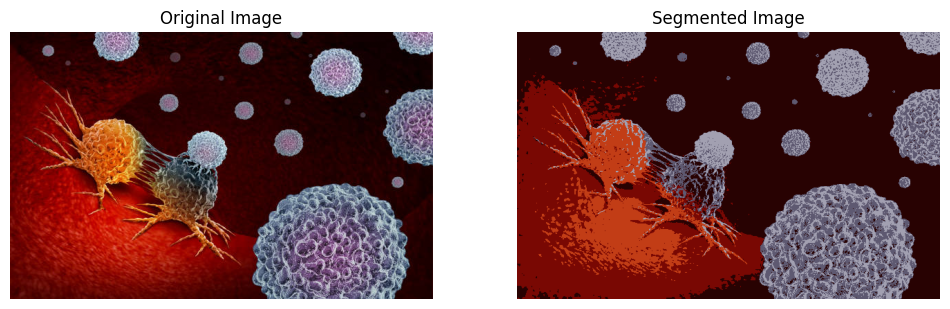

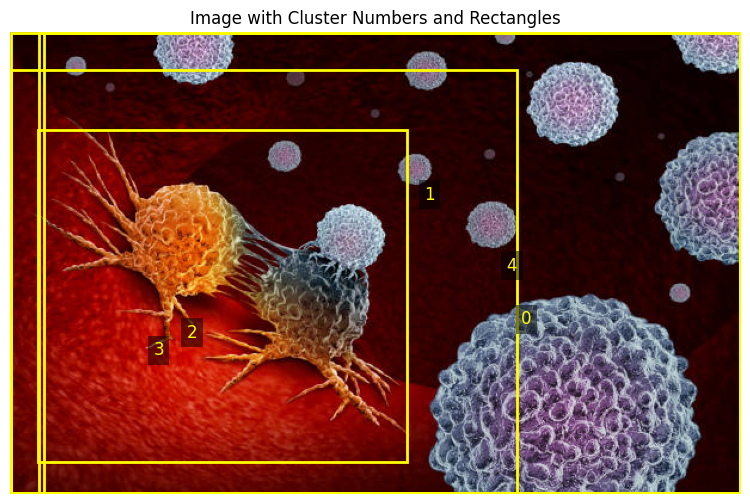

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

# Load and preprocess the image
image = io.imread('https://media.istockphoto.com/id/1097423340/photo/cancer-immunotherapy.jpg?s=612x612&w=0&k=20&c=Ee0coEeJi4L45LeyAeNE-qjUxIlf9tS0lXt3kkDw_4E=')
image = image / 255.0
pixels = image.reshape(-1, 3)

# Elbow method to find optimal k
inertia_list = []
k_range = range(1, 11)  # Testing k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)
    inertia_list.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_list, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()

# Choose optimal k
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(pixels)

# Get the cluster labels for each pixel
labels = kmeans.predict(pixels)

# Create a new image where each pixel is replaced by its cluster color
new_colors = kmeans.cluster_centers_[labels]
segmented_image = new_colors.reshape(image.shape)

# Plot original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image)
plt.axis('off')

plt.show()

plt.figure(figsize=(12, 6))
plt.imshow(image)
plt.axis('off')


h, w, _ = image.shape


for cluster_id in range(optimal_k):

    coords = np.argwhere(labels.reshape(image.shape[:2]) == cluster_id)

    if len(coords) > 0:

        top_left = coords.min(axis=0)
        bottom_right = coords.max(axis=0)


        rect = plt.Rectangle(top_left[::-1],
                             bottom_right[1] - top_left[1],
                             bottom_right[0] - top_left[0],
                             edgecolor='yellow',
                             facecolor='none',
                             linewidth=2)
        plt.gca().add_patch(rect)


        center_y = int(np.mean(coords[:, 0]))
        center_x = int(np.mean(coords[:, 1]))


        plt.text(center_x, center_y, str(cluster_id), color='yellow', fontsize=12,
                 verticalalignment='center', horizontalalignment='center',
                 bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))

plt.title('Image with Cluster Numbers and Rectangles')
plt.show()


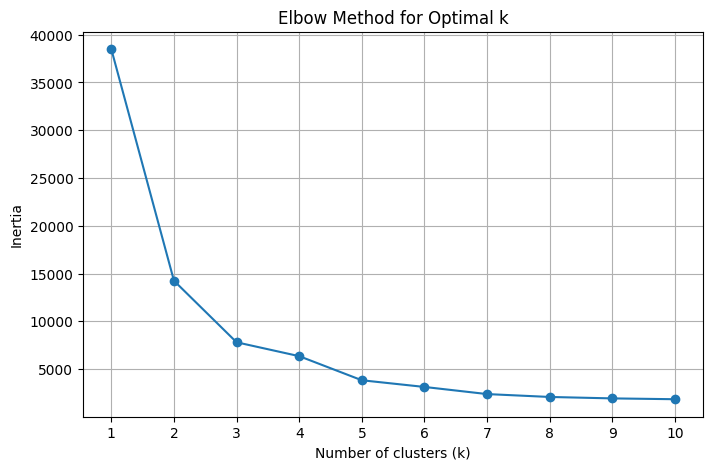

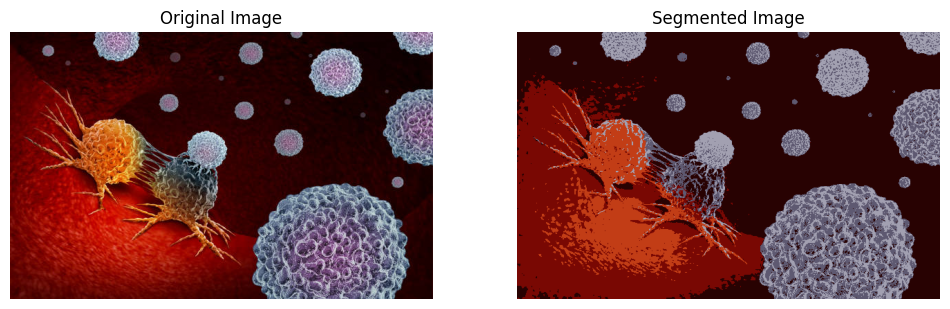

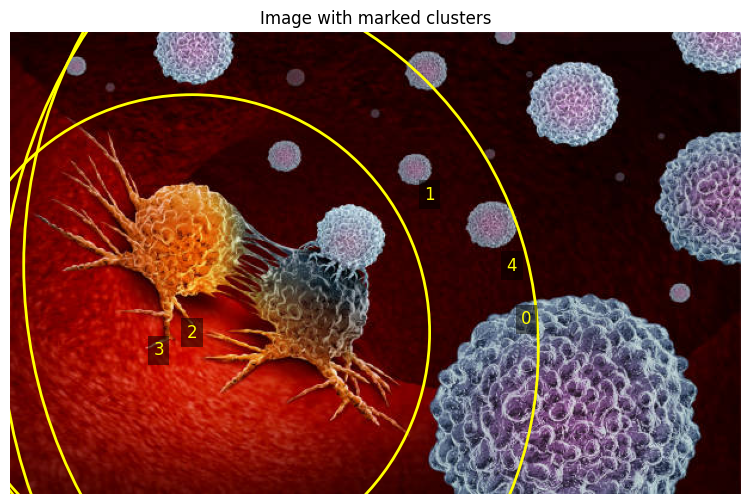

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

# Load and preprocess the image
image = io.imread('https://media.istockphoto.com/id/1097423340/photo/cancer-immunotherapy.jpg?s=612x612&w=0&k=20&c=Ee0coEeJi4L45LeyAeNE-qjUxIlf9tS0lXt3kkDw_4E=')
image = image / 255.0
pixels = image.reshape(-1, 3)

# Elbow method to find optimal k
inertia_list = []
k_range = range(1, 11)  # Testing k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)
    inertia_list.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_list, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()

# Choose optimal k
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(pixels)

# Get the cluster labels for each pixel
labels = kmeans.predict(pixels)

# Create a new image where each pixel is replaced by its cluster color
new_colors = kmeans.cluster_centers_[labels]
segmented_image = new_colors.reshape(image.shape)

# Plot original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image)
plt.axis('off')

plt.show()

plt.figure(figsize=(12, 6))
plt.imshow(image)
plt.axis('off')

h, w, _ = image.shape
for cluster_id in range(optimal_k):
    coords = np.argwhere(labels.reshape(image.shape[:2]) == cluster_id)

    if len(coords) > 0:

        center_y = int(np.mean(coords[:, 0]))
        center_x = int(np.mean(coords[:, 1]))


        distances = np.sqrt((coords[:, 0] - center_y) ** 2 + (coords[:, 1] - center_x) ** 2)
        radius = int(np.max(distances))


        circle = plt.Circle((center_x, center_y), radius, color='yellow', fill=False, linewidth=2)
        plt.gca().add_patch(circle)

        # Label the cluster with its ID
        plt.text(center_x, center_y, str(cluster_id), color='yellow', fontsize=12,
                 verticalalignment='center', horizontalalignment='center',
                 bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))

plt.title('Image with marked clusters')
plt.show()
